In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import nltk
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
np.random.seed(42)
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import ToktokTokenizer
import nltk, string, re, spacy,unicodedata, random
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
### Pretrained Word Embeddings
dataset_path = "/content/drive/MyDrive/Thesis Dataset/df2.csv"
folder_path = "/content/drive/MyDrive/Thesis Dataset"

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


CPU times: user 4.09 s, sys: 591 ms, total: 4.68 s
Wall time: 4.98 s


In [3]:
dataset_path = '/content/drive/MyDrive/Thesis Dataset/'
data = pd.read_csv(dataset_path+'df2.csv',encoding='utf-8')
print(f'Total number of Documents: {len(data)}')

Total number of Documents: 1700


In [4]:
data = data[['text','label']]

In [5]:
data = data.rename(columns={0:'text',1:'label'})

In [6]:
# Assuming 'data' is your DataFrame with columns renamed
total_categories = data['label'].nunique()
print("Total number of categories:", total_categories)

Total number of categories: 5


In [7]:
# Assuming 'data' is your DataFrame with columns renamed
category_names = data['label'].unique()
print("Category names:", category_names)


Category names: ['Software Engineering' 'Cyber Security' 'Data Communication'
 'Operating System' 'DBMS']


In [8]:
# Replace 'Cyber Security' and 'Cyber Security ' with 'Cyber Security'
data['label'] = data['label'].replace(['Cyber Security ', 'Cyber Security  '], 'Cyber Security')

# Replace 'Operating System' and 'operating System' with 'Operating System'
data['label'] = data['label'].replace(['Operating System', 'operating System'], 'Operating System')

In [9]:
# Assuming 'data' is your DataFrame with the 'label' column containing category names
unique_classes = data['label'].unique()
print("Unique classes:", unique_classes)

Unique classes: ['Software Engineering' 'Cyber Security' 'Data Communication'
 'Operating System' 'DBMS']


In [10]:
print("First rows of dataset")
data.head()

First rows of dataset


,text,label
0,সফ্টওয়্যার আমাদের সময়ের তথ্যের সবচেয়ে গুরুত...,Software Engineering
1,"এটি ব্যক্তিগত ডেটা রূপান্তর করে (যেমন, একজন ব্...",Software Engineering
2,এটি এমন একটি বাহনও সরবরাহ করে যা ব্যক্তিগত গোপ...,Software Engineering
3,কম্পিউটার সফ্টওয়্যারের ভূমিকা গত 60 বছরে উল্ল...,Software Engineering
4,"হার্ডওয়্যার পারফরম্যান্সে নাটকীয় উন্নতি, কম্...",Software Engineering


In [11]:
print("Description of dataset")
data.describe()

Description of dataset


,text,label
count,1699,1700
unique,1699,5
top,"একটি সমজাতীয় বিতরণ করা ডাটাবেস সিস্টেমে, নোডগ...",Cyber Security
freq,1,419


In [12]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    #english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    #text=english_pattern.sub(r'', text)
    text = re.sub(r'₀|₁|₂|₃|₄|₅|₆|₇|₈|₉', '', text)
    #text = re.sub(r'⁰|¹|²|³|⁴|⁵|⁶|⁷|⁸|⁹|⁻|⁺|ⁿ|ᵗ', '', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=৳০১২৩৪৫৬৭৮৯012–34567•89।!()-−[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰θ→°π∈∝α≤≥Δβε≠�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out




In [13]:
data['cleaned'] = data['text'].apply(lambda x: preprocessing(str(x)))

In [14]:
# Print some cleaned text from the dataset
sample_data = range(100,200)
for i in sample_data:
    print(data['cleaned'][i])

সফ্টওয়্যার কনফিগারেশন পরিচালনা সফ্টওয়্যার প্রক্রিয়া জুড়ে পরিবর্তনের প্রভাবগুলি পরিচালনা করে  পুনর্ব্যবহারযোগ্যতা ব্যবস্থাপনা  কাজের পণ্য পুনঃব্যবহারের জন্য মানদণ্ড নির্ধারণ করে সফ্টওয়্যার উপাদান সহ এবং পুনরায় ব্যবহারযোগ্য উপাদানগুলি অর্জনের জন্য প্রক্রিয়া স্থাপন করে
কাজের পণ্য প্রস্তুতি এবং উত্পাদন  মডেল নথি লগ ফর্ম এবং তালিকার মতো কাজের পণ্য তৈরির জন্য প্রয়োজনীয় ক্রিয়াকলাপগুলিকে অন্তর্ভুক্ত করে
পূর্বে এই বিভাগে আমরা উল্লেখ করেছি যে সফ্টওয়্যার ইঞ্জিনিয়ারিং প্রক্রিয়া একটি কঠোর প্রেসক্রিপশন নয় যা একটি সফ্টওয়্যার দলকে অবশ্যই দৃঢ়ভাবে অনুসরণ করতে হবে
বরং এটি চটপটে এবং অভিযোজিত হওয়া উচিত সমস্যা প্রকল্প দল এবং সাংগঠনিক সংস্কৃতিতে
অতএব একটি প্রকল্পের জন্য গৃহীত একটি প্রক্রিয়া অন্য প্রকল্পের জন্য গৃহীত একটি প্রক্রিয়া থেকে উল্লেখযোগ্যভাবে ভিন্ন হতে পারে
পার্থক্যগুলির মধ্যে রয়েছে ক্রিয়াকলাপ ক্রিয়া এবং কাজের সামগ্রিক প্রবাহ এবং তাদের মধ্যে আন্তঃনির্ভরতা
ডিগ্রী যেখানে কর্ম এবং কাজ প্রতিটি কাঠামো কার্যকলাপের মধ্যে সংজ্ঞায়িত করা হয়
ডিগ্রী যেখানে কাজের পণ্য চিহ্নিত এবং প্রয়োজন

In [15]:
stop =["অতএব","অথচ","অথবা","অনুযায়ী","অনেক","অনেকে","অনেকেই","অন্তত","অন্য","অবধি","অবশ্য","অর্থাত","আই","আগামী","আগে","আগেই","আছে","আজ","আদ্যভাগে","আপনার","আপনি","আবার","আমরা","আমাকে","আমাদের","আমার","আমি","আর","আরও","ই","ইত্যাদি","ইহা","উচিত","উত্তর","উনি","উপর","উপরে","এ","এঁদের","এঁরা","এই","একই","একটি","একবার","একে","এক্","এখন","এখনও","এখানে","এখানেই","এটা","এটাই","এটি","এত","এতটাই","এতে","এদের","এব","এবং","এবার","এমন","এমনকী","এমনি","এর","এরা","এল","এস","এসে","ঐ","ও","ওঁদের","ওঁর","ওঁরা","ওই","ওকে","ওখানে","ওদের","ওর","ওরা","কখনও","কত","কবে","কমনে","কয়েক","কয়েকটি","করছে","করছেন","করতে","করবে","করবেন","করলে","করলেন","করা","করাই","করায়","করার","করি","করিতে","করিয়া","করিয়ে","করে","করেই","করেছিলেন","করেছে","করেছেন","করেন","কাউকে","কাছ","কাছে","কাজ","কাজে","কারও","কারণ","কি","কিংবা","কিছু","কিছুই","কিন্তু","কী","কে","কেউ","কেউই","কেখা","কেন","কোটি","কোন","কোনও","কোনো","ক্ষেত্রে","কয়েক","খুব","গিয়ে","গিয়েছে","গিয়ে","গুলি","গেছে","গেল","গেলে","গোটা","চলে","চান","চায়","চার","চালু","চেয়ে","চেষ্টা","ছাড়া","ছাড়াও","ছিল","ছিলেন","জন","জনকে","জনের","জন্য","জন্যওজে","জানতে","জানা","জানানো","জানায়","জানিয়ে","জানিয়েছে","জে","জ্নজন","টি","ঠিক","তখন","তত","তথা","তবু","তবে","তা","তাঁকে","তাঁদের","তাঁর","তাঁরা","তাঁাহারা","তাই","তাও","তাকে","তাতে","তাদের","তার","তারপর","তারা","তারৈ","তাহলে","তাহা","তাহাতে","তাহার","তিনঐ","তিনি","তিনিও","তুমি","তুলে","তেমন","তো","তোমার","থাকবে","থাকবেন","থাকা","থাকায়","থাকে","থাকেন","থেকে","থেকেই","থেকেও","দিকে","দিতে","দিন","দিয়ে","দিয়েছে","দিয়েছেন","দিলেন","দু","দুই","দুটি","দুটো","দেওয়া","দেওয়ার","দেওয়া","দেখতে","দেখা","দেখে","দেন","দেয়","দ্বারা","ধরা","ধরে","ধামার","নতুন","নয়","না","নাই","নাকি","নাগাদ","নানা","নিজে","নিজেই","নিজেদের","নিজের","নিতে","নিয়ে","নিয়ে","নেই","নেওয়া","নেওয়ার","নেওয়া","নয়","পক্ষে","পর","পরে","পরেই","পরেও","পর্যন্ত","পাওয়া","পাচ","পারি","পারে","পারেন","পি","পেয়ে","পেয়্র্","প্রতি","প্রথম","প্রভৃতি","প্রযন্ত","প্রাথমিক","প্রায়","প্রায়","ফলে","ফিরে","ফের","বক্তব্য","বদলে","বন","বরং","বলতে","বলল","বললেন","বলা","বলে","বলেছেন","বলেন","বসে","বহু","বা","বাদে","বার","বি","বিনা","বিভিন্ন","বিশেষ","বিষয়টি","বেশ","বেশি","ব্যবহার","ব্যাপারে","ভাবে","ভাবেই","মতো","মতোই","মধ্যভাগে","মধ্যে","মধ্যেই","মধ্যেও","মনে","মাত্র","মাধ্যমে","মোট","মোটেই","যখন","যত","যতটা","যথেষ্ট","যদি","যদিও","যা","যাঁর","যাঁরা","যাওয়া","যাওয়ার","যাওয়া","যাকে","যাচ্ছে","যাতে","যাদের","যান","যাবে","যায়","যার","যারা","যিনি","যে","যেখানে","যেতে","যেন","যেমন","র","রকম","রয়েছে","রাখা","রেখে","লক্ষ","শুধু","শুরু","সঙ্গে","সঙ্গেও","সব","সবার","সমস্ত","সম্প্রতি","সহ","সহিত","সাথে","সাধারণ","সামনে","সি","সুতরাং","সে","সেই","সেখান","সেখানে","সেটা","সেটাই","সেটাও","সেটি","স্পষ্ট","স্বয়ং","হইতে","হইবে","হইয়া","হওয়া","হওয়ায়","হওয়ার","হচ্ছে","হত","হতে","হতেই","হন","হবে","হবেন","হয়","হয়তো","হয়নি","হয়ে","হয়েই","হয়েছিল","হয়েছে","হয়েছেন","হল","হলে","হলেই","হলেও","হলো","হাজার","হিসাবে","হৈলে","হোক","হয়"]
display(stop)

['অতএব',
 'অথচ',
 'অথবা',
 'অনুযায়ী',
 'অনেক',
 'অনেকে',
 'অনেকেই',
 'অন্তত',
 'অন্য',
 'অবধি',
 'অবশ্য',
 'অর্থাত',
 'আই',
 'আগামী',
 'আগে',
 'আগেই',
 'আছে',
 'আজ',
 'আদ্যভাগে',
 'আপনার',
 'আপনি',
 'আবার',
 'আমরা',
 'আমাকে',
 'আমাদের',
 'আমার',
 'আমি',
 'আর',
 'আরও',
 'ই',
 'ইত্যাদি',
 'ইহা',
 'উচিত',
 'উত্তর',
 'উনি',
 'উপর',
 'উপরে',
 'এ',
 'এঁদের',
 'এঁরা',
 'এই',
 'একই',
 'একটি',
 'একবার',
 'একে',
 'এক্',
 'এখন',
 'এখনও',
 'এখানে',
 'এখানেই',
 'এটা',
 'এটাই',
 'এটি',
 'এত',
 'এতটাই',
 'এতে',
 'এদের',
 'এব',
 'এবং',
 'এবার',
 'এমন',
 'এমনকী',
 'এমনি',
 'এর',
 'এরা',
 'এল',
 'এস',
 'এসে',
 'ঐ',
 'ও',
 'ওঁদের',
 'ওঁর',
 'ওঁরা',
 'ওই',
 'ওকে',
 'ওখানে',
 'ওদের',
 'ওর',
 'ওরা',
 'কখনও',
 'কত',
 'কবে',
 'কমনে',
 'কয়েক',
 'কয়েকটি',
 'করছে',
 'করছেন',
 'করতে',
 'করবে',
 'করবেন',
 'করলে',
 'করলেন',
 'করা',
 'করাই',
 'করায়',
 'করার',
 'করি',
 'করিতে',
 'করিয়া',
 'করিয়ে',
 'করে',
 'করেই',
 'করেছিলেন',
 'করেছে',
 'করেছেন',
 'করেন',
 'কাউকে',
 'কাছ',
 'কাছে',
 'কাজ',
 'কাজে',
 'কারও',
 '

In [16]:
def stopwordRemoval(text):
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stop]

    out=' '.join(stm)

    return str(out)

In [17]:
# Apply the stopwordRemoval function to the 'clean text' column
data['cleaned'] = data['cleaned'].apply(lambda x: stopwordRemoval(str(x)))

# Iterate through the first 1000 rows and print the 'clean text' column values
sample_data = range(0, 100)
for i in sample_data:
    print(data['cleaned'][i])

সফ্টওয়্যার সময়ের তথ্যের সবচেয়ে গুরুত্বপূর্ণ পণ্য সরবরাহ
ব্যক্তিগত ডেটা রূপান্তর একজন ব্যক্তির আর্থিক লেনদেন ডেটা স্থানীয় প্রসঙ্গে কার্যকর ব্যবসায়িক তথ্য পরিচালনা কম্পিটিটিভিটি বাড়ানোর বিশ্বব্যাপী তথ্য নেটওয়ার্কের গেটওয়ে প্রদান ইন্টারনেট ধরনের তথ্য অর্জনের উপায় প্রদান
বাহনও সরবরাহ ব্যক্তিগত গোপনীয়তাকে হুমকির মুখে ফেলতে গেটওয়ে দূষিত অভিপ্রায়যুক্ত ব্যক্তিদের অপরাধমূলক সক্ষম
কম্পিউটার সফ্টওয়্যারের ভূমিকা গত বছরে উল্লেখযোগ্য পরিবর্তন
হার্ডওয়্যার পারফরম্যান্সে নাটকীয় উন্নতি কম্পিউটিং আর্কিটেকচারে গভীর পরিবর্তন মেমরি স্টোরেজ ক্ষমতার ব্যাপক বৃদ্ধি বিস্তৃত বৈচিত্র্যময় ইনপুট আউটপুট বিকল্পগুলি পরিশীলিত জটিল কম্পিউটারভিত্তিক সিস্টেমগুলিকে প্ররোচিত
পরিশীলিততা জটিলতা সিস্টেম সফল চমকপ্রদ ফলাফল আনতে বিশাল সমস্যা তৈরি অবশ্যই জটিল সিস্টেম তৈরি রক্ষা
বিশাল সফ্টওয়্যার শিল্প শিল্পোন্নত বিশ্বের অর্থনীতিতে প্রভাবশালী ফ্যাক্টর উঠেছে
সফ্টওয়্যার বিশেষজ্ঞদের দল প্রত্যেকে জটিল অ্যাপ্লিকেশন সরবরাহ প্রয়োজনীয় প্রযুক্তির অংশে ফোকাস আগের যুগের একাকী প্রোগ্রামারকে প্রতিস্থাপন
তবুও একাকী প্রোগ্রামারক

Total number of text: 1700


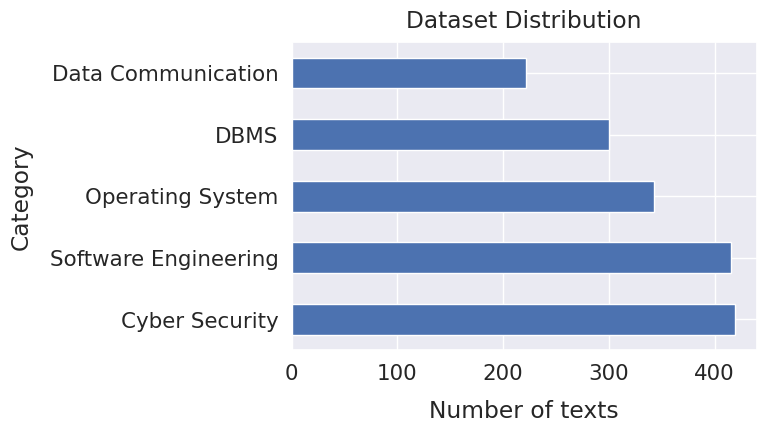

In [18]:
print(f'Total number of text: {len(data)}')
sns.set(font_scale=1.4)
data['label'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of texts", labelpad=12)
plt.ylabel("Category", labelpad=12)
plt.yticks(rotation = 0)
plt.title("Dataset Distribution", y=1.02);

In [ ]:
pip install matplotlib seaborn

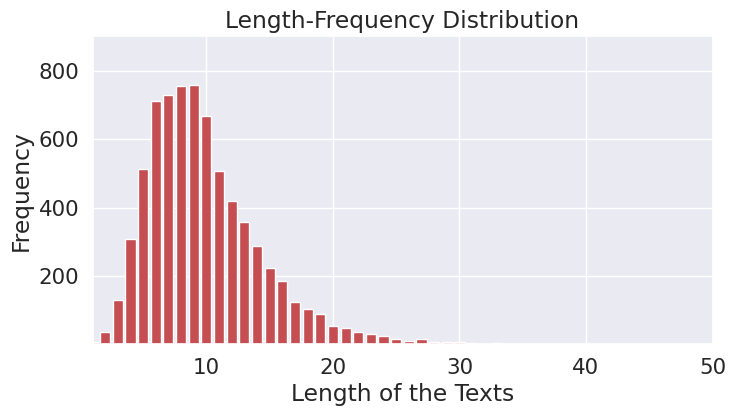

Maximum Length of a text: 69
Minimum Length of a text: 1
Average Length of a text: 10.0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming data is your DataFrame

# Calculate text length
data['TextLength'] = data['cleaned'].apply(lambda x: len(x.split()))

# Create a dictionary for frequency distribution
frequency = dict()
for i in data['TextLength']:
    frequency[i] = frequency.get(i, 0) + 1

# Plot the bar chart for frequency distribution
plt.figure(figsize=(8, 4))
plt.bar(frequency.keys(), frequency.values(), color="r")
plt.xlim(1, 50)
plt.ylim(1, 900)
plt.xlabel('Length of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()

# Print statistics
print(f"Maximum Length of a text: {max(data['TextLength'])}")
print(f"Minimum Length of a text: {min(data['TextLength'])}")
print(f"Average Length of a text: {round(np.mean(data['TextLength']), 0)}")

In [ ]:
category_list = data['label'].unique()
category_list
category_list = ['Software Engineering', 'DBMS', 'Data Communication',
       'Cyber Security', 'Operating System']

In [ ]:
cleaned_text = data['cleaned']
cleaned_text

0       সফটওয়্যার ইঞ্জিনিয়ারিং দুইটি শব্দ সফটওয়্যার...
1                           সফটওয়্যার প্রোগ্রামের সমষ্টি
2       প্রোগ্রাম নির্ধারিত সমস্যা সমাধানের উদ্দেশ্যে ...
3       অপরদিকে ইঞ্জিনিয়ারিং সকল নীতিমালা মেথড সমূহ প...
4                         সফটওয়্যার ইঞ্জিনিয়ারিং বুঝায়
                              ...                        
7201    ছোট অ্যাপ্লিকেশনের ডাটাবেস ডিজাইনারের সম্ভব বো...
7202    ডাটাবেস ডিজাইনার অ্যাপ্লিকেশানের চাহিদাগুলি বো...
7203    উচ্চস্তরের ডেটা মডেল ধারণাগত কাঠামো প্রদান ডাট...
7204    ডাটাবেস ডিজাইনের পর্যায় সম্ভাব্য ডাটাবেস ব্যব...
7205    ডাটাবেস ডিজাইনারকে ব্যাপকভাবে যোগাযোগ কাজটি সম...
Name: cleaned, Length: 7206, dtype: object

In [ ]:
refined_sentence = " ".join(cleaned_text)

In [ ]:
!wget https://www.omicronlab.com/download/fonts/kalpurush.ttf

--2024-05-08 09:12:45--  https://www.omicronlab.com/download/fonts/kalpurush.ttf
Resolving www.omicronlab.com (www.omicronlab.com)... 104.21.12.234, 172.67.153.233, 2606:4700:3030::6815:cea, ...
Connecting to www.omicronlab.com (www.omicronlab.com)|104.21.12.234|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 314592 (307K) [application/octet-stream]
Saving to: ‘kalpurush.ttf.1’

kalpurush.ttf.1     100%[===================>] 307.22K  --.-KB/s    in 0.03s   

2024-05-08 09:12:46 (9.28 MB/s) - ‘kalpurush.ttf.1’ saved [314592/314592]



In [ ]:
!pip install wordcloud matplotlib

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
words = refined_sentence.split()

In [ ]:
from collections import Counter

word_counts = Counter(words)

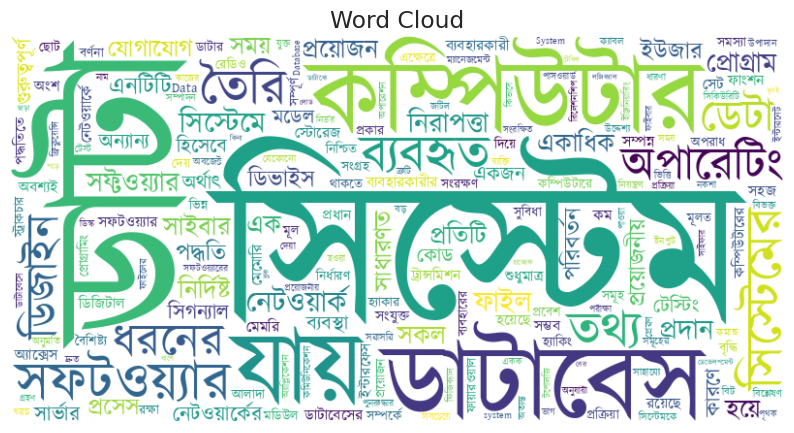

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ওয়ার্ড ক্লাউড জেনারেট
wordcloud = WordCloud(
    font_path='/content/kalpurush.ttf',  # Specify the font path as necessary
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(word_counts)

# ওয়ার্ড ক্লাউড প্রদর্শন
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud")
plt.show()

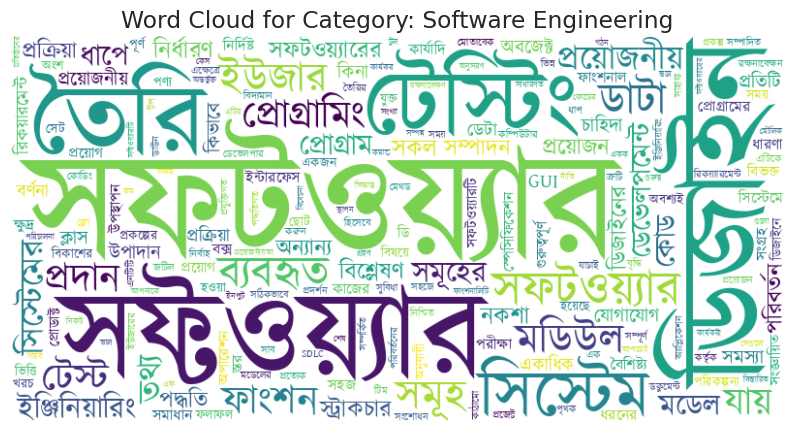

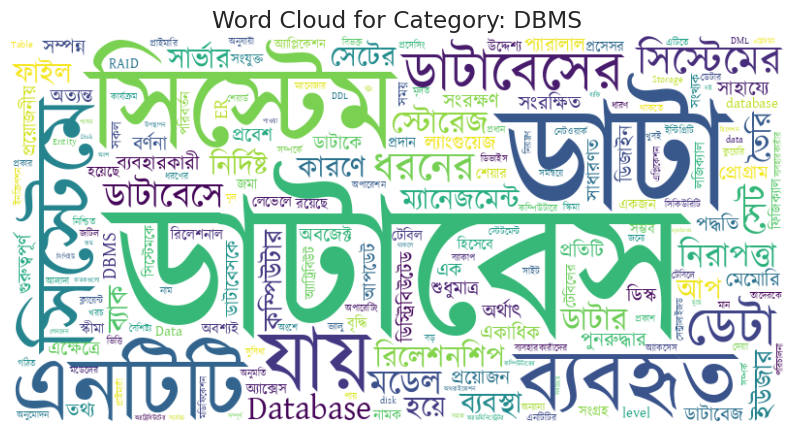

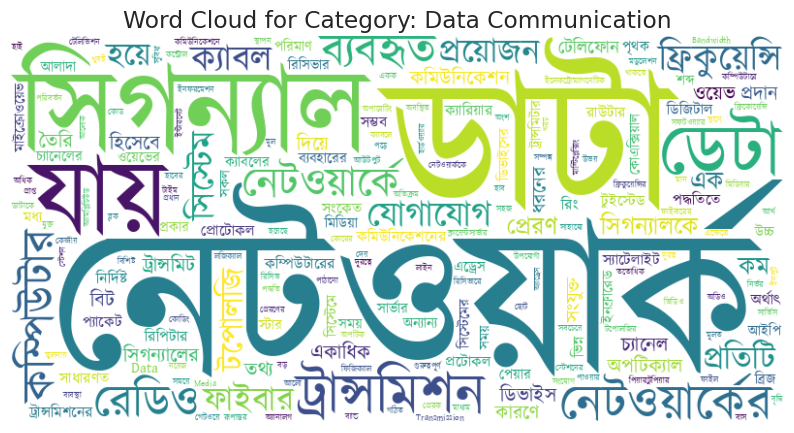

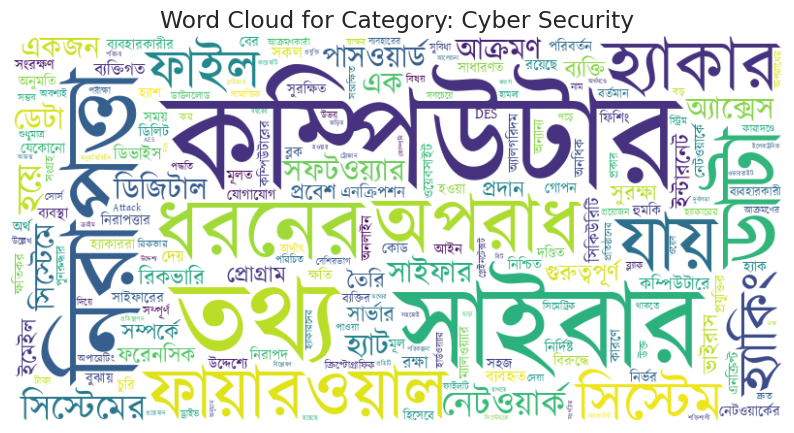

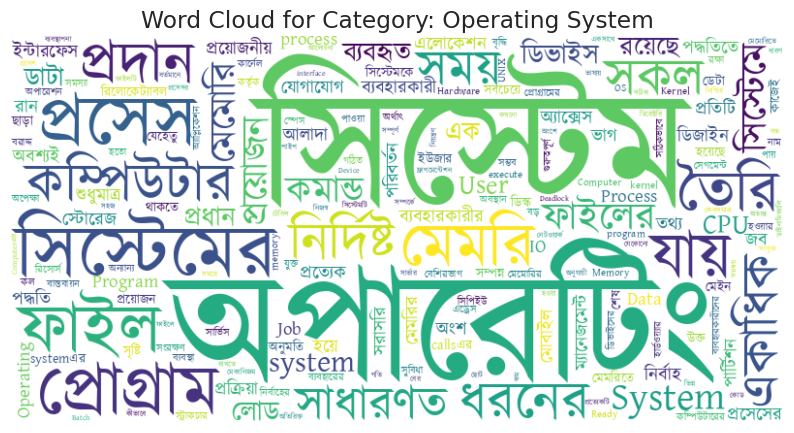

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Assuming 'data' is your DataFrame and 'label' is the column with categories
categories = data['label'].unique()  # Get unique categories

# Iterate through each category
for category in categories:
    # Filter data for the current category
    category_data = data[data['label'] == category]

    # Combine all cleaned texts for the current category into a single string
    category_text = " ".join(category_data['cleaned'])

    # Split the text into words and calculate word frequencies
    words = category_text.split()
    word_counts = Counter(words)

    # Generate the word cloud for the current category
    wordcloud = WordCloud(
        font_path='/content/kalpurush.ttf',  # Specify the font path as necessary
        width=800,
        height=400,
        background_color='white'
    ).generate_from_frequencies(word_counts)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Category: {category}")
    plt.show()


In [19]:
# Split the data into training, validation, and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)

# Print the shapes of the resulting datasets
print("Training data shape:", train_data.shape)
print("Validation data shape:", val_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (1360, 3)
Validation data shape: (170, 3)
Testing data shape: (170, 3)


In [20]:
train_data['enc_label'] = train_data['label'].replace({'Software Engineering':0, 'DBMS':1, 'Data Communication':2 ,'Cyber Security':3,
 'Operating System':4})
val_data['enc_label'] = val_data['label'].replace({'Software Engineering':0, 'DBMS':1, 'Data Communication':2 ,'Cyber Security':3,
 'Operating System':4})

In [21]:
train_data

,text,label,cleaned,enc_label
1376,মেমরি ম্যানেজমেন্ট অ্যালগরিদমগুলি একটি আদিম বে...,Operating System,মেমরি ম্যানেজমেন্ট অ্যালগরিদমগুলি আদিম বেয়ারম...,4
1323,একবার একটি প্রক্রিয়ার মাধ্যমে একটি ফাইল খোলা ...,Operating System,প্রক্রিয়ার ফাইল খোলা সিস্টেমওয়াইড টেবিলে ফাই...,4
1179,"তাদের নাম দিয়ে সেগুলি তৈরি এবং মুছতে হবে, একট...",Operating System,নাম সেগুলি তৈরি মুছতে প্রদত্ত ফাইল অনুসন্ধান ত...,4
651,আসুন বাস্তব জগতে ক্রিপ্টোসিস্টেম ভাঙার বিভিন্ন...,Cyber Security,আসুন বাস্তব জগতে ক্রিপ্টোসিস্টেম ভাঙার উপায় দেখি,3
464,দ্রষ্টব্য করুন যে এই সময়মান ভুলযোগ্যতা কোনও অ...,Cyber Security,দ্রষ্টব্য করুন সময়মান ভুলযোগ্যতা নিরাপত্তা পদ...,3
...,...,...,...,...
1130,"যখন সিপিইউ বাধাগ্রস্ত হয়, তখন এটি যা করছে এবং...",Operating System,সিপিইউ বাধাগ্রস্ত অবিলম্বে বন্ধ নির্দিষ্ট স্থা...,4
1294,একটি ফাইলের একটি নির্দিষ্ট সংজ্ঞায়িত কাঠামো আ...,Operating System,ফাইলের নির্দিষ্ট সংজ্ঞায়িত কাঠামো ধরনের নির্ভর,4
860,লক্ষ্য হল যোগাযোগ ব্যবস্থা ডিজাইন করা যা প্রাপ...,Data Communication,লক্ষ্য যোগাযোগ ব্যবস্থা ডিজাইন প্রাপকের তথ্য প...,2
1459,দক্ষতার প্রয়োজন আছে ডাটাবেসের মধ্যে ডেটা প্রত...,DBMS,দক্ষতার প্রয়োজন ডাটাবেসের ডেটা প্রতিনিধিত্ব জ...,1


In [22]:
train_data['cleaned'].tolist()

['মেমরি ম্যানেজমেন্ট অ্যালগরিদমগুলি আদিম বেয়ারমেশিন পদ্ধতি পেজিং সেগমেন্টেশন কৌশলগুলিতে পরিবর্তিত',
 'প্রক্রিয়ার ফাইল খোলা সিস্টেমওয়াইড টেবিলে ফাইলটির এন্ট্রি অন্তর্ভুক্ত',
 'নাম সেগুলি তৈরি মুছতে প্রদত্ত ফাইল অনুসন্ধান তালিকা ফাইল তথ্য',
 'আসুন বাস্তব জগতে ক্রিপ্টোসিস্টেম ভাঙার উপায় দেখি',
 'দ্রষ্টব্য করুন সময়মান ভুলযোগ্যতা নিরাপত্তা পদক্ষেপ বাধাগ্রস্ত চিত্র কেবলমাত্র গ্রাহকটি চিনতে পারবে ফ্যাক্টর প্রমাণীকরণ',
 'রিলেশনাল মডেলটি ডেটা ডেটাগুলির সম্পর্ক উভয়ের প্রতিনিধিত্ব টেবিলের সংগ্রহ',
 'প্রতিফলন কোণ ionospheric প্রতিফলন বিন্দুতে সংকেত হারানো ফ্রিকোয়েন্সি নির্ভর দিনের সময় বছরের ঋতু সানস্পট কার্যকলাপ',
 'অপারেটিং সিস্টেম অনুক্রমিক সরাসরি অ্যাক্সেস সমর্থন নথি পত্র',
 'বিট যোগ অর্জন প্লেইনটেক্সট বিট স্ট্রিম',
 'আইন ব্যবস্থাও অত্যন্ত ভালোভাবে কম্পিউটার প্রযুক্তিতে সংযুক্ত পুরানো আইনি সুরক্ষা ফর্ম কপিরাইট প্যাটেন্ট পুনরায় যথাযথ কানুন তৈরি মালিশাস অ্যাক্সেস',
 'ডেটা ব্যবহারকারীর ভাগ সিস্টেমটি অবশ্যই সম্ভাব্য অস্বাভাবিক ফলাফল এড়াবে',
 'অন্যরা Windows UNIX কমান্ড ইন্টারপ্রেটারকে প্র

In [23]:
train_data['enc_label'].value_counts()

enc_label
3    329
0    329
4    280
1    243
2    179
Name: count, dtype: int64

In [24]:
val_data['enc_label'].value_counts()

enc_label
0    47
3    41
4    29
1    28
2    25
Name: count, dtype: int64

In [25]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [26]:
train_data = train_data.rename(columns={'label_Software Engineering':'Software Engineering','label_DBMS':'DBMS',
                                        'label_Data Communication':'Data Communication','label_Cyber Security':'Cyber Security','label_Operating System':'Operating System'})

train_data

,text,label,cleaned,enc_label
1376,মেমরি ম্যানেজমেন্ট অ্যালগরিদমগুলি একটি আদিম বে...,Operating System,মেমরি ম্যানেজমেন্ট অ্যালগরিদমগুলি আদিম বেয়ারম...,4
1323,একবার একটি প্রক্রিয়ার মাধ্যমে একটি ফাইল খোলা ...,Operating System,প্রক্রিয়ার ফাইল খোলা সিস্টেমওয়াইড টেবিলে ফাই...,4
1179,"তাদের নাম দিয়ে সেগুলি তৈরি এবং মুছতে হবে, একট...",Operating System,নাম সেগুলি তৈরি মুছতে প্রদত্ত ফাইল অনুসন্ধান ত...,4
651,আসুন বাস্তব জগতে ক্রিপ্টোসিস্টেম ভাঙার বিভিন্ন...,Cyber Security,আসুন বাস্তব জগতে ক্রিপ্টোসিস্টেম ভাঙার উপায় দেখি,3
464,দ্রষ্টব্য করুন যে এই সময়মান ভুলযোগ্যতা কোনও অ...,Cyber Security,দ্রষ্টব্য করুন সময়মান ভুলযোগ্যতা নিরাপত্তা পদ...,3
...,...,...,...,...
1130,"যখন সিপিইউ বাধাগ্রস্ত হয়, তখন এটি যা করছে এবং...",Operating System,সিপিইউ বাধাগ্রস্ত অবিলম্বে বন্ধ নির্দিষ্ট স্থা...,4
1294,একটি ফাইলের একটি নির্দিষ্ট সংজ্ঞায়িত কাঠামো আ...,Operating System,ফাইলের নির্দিষ্ট সংজ্ঞায়িত কাঠামো ধরনের নির্ভর,4
860,লক্ষ্য হল যোগাযোগ ব্যবস্থা ডিজাইন করা যা প্রাপ...,Data Communication,লক্ষ্য যোগাযোগ ব্যবস্থা ডিজাইন প্রাপকের তথ্য প...,2
1459,দক্ষতার প্রয়োজন আছে ডাটাবেসের মধ্যে ডেটা প্রত...,DBMS,দক্ষতার প্রয়োজন ডাটাবেসের ডেটা প্রতিনিধিত্ব জ...,1


In [27]:
val_data['cleaned'].shape

(170,)

In [28]:
def char_length(row):
    return len(row.split())

In [29]:
lables = ['Software Engineering' 'DBMS' 'Data Communication' 'Cyber Security'
 'Operating System']

# Count number of unique words in each set
def dataset_statistics(dataset):
  for l in lables:
    word_list = [word.strip() for t in list(dataset[dataset[l]==1.0].cleaned) for word in t.strip().split()]
    print(f"\nClass Name:--> {l} ")
    print("Number of Words:{}".format(len(word_list)))
    print("Number of Unique Words:{}".format(len(np.unique(word_list))))
    print("Maximum post length: {}".format(max(dataset[dataset[l]==1.0].cleaned.apply(char_length))))
    print("Average Words in texts: {}".format(np.mean(dataset[dataset[l]==1.0].cleaned.apply(char_length))))

In [30]:
# Class Distribution
class_distribution = train_data['label'].value_counts()

# Text Length Distribution
train_data['text_length'] = train_data['cleaned'].apply(lambda x: len(x.split()))
text_length_stats = train_data['text_length'].describe()

print("Class Distribution:")
print(class_distribution)
print("\nText Length Distribution:")
print(text_length_stats)

Class Distribution:
label
Cyber Security          329
Software Engineering    329
Operating System        280
DBMS                    243
Data Communication      179
Name: count, dtype: int64

Text Length Distribution:
count    1360.000000
mean       11.104412
std         5.348707
min         1.000000
25%         8.000000
50%        10.000000
75%        13.000000
max        57.000000
Name: text_length, dtype: float64


In [31]:
class_statistics = {}

# Iterate over each unique class
for class_name in data['label'].unique():
    # Filter the training data for the current class
    class_data = data[data['label'] == class_name]

    # Number of Words
    total_words = class_data['cleaned'].apply(lambda x: len(x.split())).sum()

    # Number of Unique Words
    unique_words = len(set(" ".join(class_data['cleaned']).split()))

    # Maximum Post Length
    max_length = class_data['cleaned'].apply(lambda x: len(x.split())).max()

    # Average Words in Texts
    average_length = class_data['cleaned'].apply(lambda x: len(x.split())).mean()

    # Store the statistics for the current class
    class_statistics[class_name] = {
        'Number of Words': total_words,
        'Number of Unique Words': unique_words,
        'Maximum post length': max_length,
        'Average Words in texts': average_length
    }

# Print the statistics for each class
for class_name, stats in class_statistics.items():
    print("Class Name:", class_name)
    for stat_name, value in stats.items():
        print(f"{stat_name}: {value}")
    print()


Class Name: Software Engineering
Number of Words: 5031
Number of Unique Words: 1740
Maximum post length: 57
Average Words in texts: 12.09375

Class Name: Cyber Security
Number of Words: 4556
Number of Unique Words: 1894
Maximum post length: 37
Average Words in texts: 10.873508353221958

Class Name: Data Communication
Number of Words: 2648
Number of Unique Words: 1260
Maximum post length: 30
Average Words in texts: 11.927927927927929

Class Name: Operating System
Number of Words: 3557
Number of Unique Words: 1223
Maximum post length: 24
Average Words in texts: 10.370262390670554

Class Name: DBMS
Number of Words: 3323
Number of Unique Words: 1169
Maximum post length: 30
Average Words in texts: 11.076666666666666



In [32]:
!pip install ktrain

In [33]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [34]:
import ktrain
from ktrain import text

In [35]:
train_data['label'].value_counts()

label
Cyber Security          329
Software Engineering    329
Operating System        280
DBMS                    243
Data Communication      179
Name: count, dtype: int64

In [36]:
val_data['label'].value_counts()

label
Software Engineering    47
Cyber Security          41
Operating System        29
DBMS                    28
Data Communication      25
Name: count, dtype: int64

In [37]:
categories = ['Software Engineering', 'DBMS' ,'Data Communication', 'Cyber Security',
 'Operating System']

In [38]:
X_train = train_data['cleaned'].tolist()
y_train = train_data['label'].tolist()

X_valid = val_data['cleaned'].tolist()
y_valid = val_data['label'].tolist()

X_test = test_data['cleaned'].tolist()
y_test = test_data['label'].tolist()

In [39]:
model_name = 'csebuetnlp/banglabert'
trans = text.Transformer(model_name,maxlen=100,class_names=categories)

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [40]:
train = trans.preprocess_train(X_train,y_train)
valid = trans.preprocess_test(X_valid,y_valid)

preprocessing train...
language: bn
train sequence lengths:
	mean : 11
	95percentile : 21
	99percentile : 29


tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 12
	95percentile : 23
	99percentile : 29


In [41]:
!pip install transformers==4.37.2

In [42]:
model = trans.get_classifier()

In [43]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=32)

In [44]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced'
                                               ,classes = np.unique(train_data['enc_label'])
                                               ,y = train_data['enc_label'])
class_weights = dict(zip(np.unique(train_data['enc_label']), class_weights))

In [45]:
weight = {i : class_weights[i] for i in range(5)}
weight

{0: 0.8267477203647416,
 1: 1.1193415637860082,
 2: 1.5195530726256983,
 3: 0.8267477203647416,
 4: 0.9714285714285714}

In [46]:
learner.fit_onecycle(2e-5,10,class_weight=weight)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
43/43 [==============================] - 54s 688ms/step - loss: 1.6111 - accuracy: 0.2551 - val_loss: 1.5926 - val_accuracy: 0.3235
Epoch 2/10
43/43 [==============================] - 26s 616ms/step - loss: 1.5817 - accuracy: 0.3096 - val_loss: 1.5234 - val_accuracy: 0.4118
Epoch 3/10
43/43 [==============================] - 27s 620ms/step - loss: 1.4042 - accuracy: 0.5522 - val_loss: 1.2231 - val_accuracy: 0.7059
Epoch 4/10
43/43 [==============================] - 27s 629ms/step - loss: 0.9878 - accuracy: 0.7838 - val_loss: 0.7171 - val_accuracy: 0.8294
Epoch 5/10
43/43 [==============================] - 27s 619ms/step - loss: 0.5357 - accuracy: 0.9096 - val_loss: 0.4666 - val_accuracy: 0.8765
Epoch 6/10
43/43 [==============================] - 27s 618ms/step - loss: 0.2984 - accuracy: 0.9456 - val_loss: 0.3400 - val_accuracy: 0.9294
Epoch 7/10
43/43 [==============================] - 27s 624ms/step - loss: 0.19

In [47]:
learner.validate(class_names=categories)

6/6 [==============================] - 8s 200ms/step
                      precision    recall  f1-score   support

Software Engineering       0.97      0.90      0.94        41
                DBMS       0.88      0.82      0.85        28
  Data Communication       0.92      0.92      0.92        25
      Cyber Security       0.81      1.00      0.89        29
    Operating System       0.98      0.94      0.96        47

            accuracy                           0.92       170
           macro avg       0.91      0.92      0.91       170
        weighted avg       0.92      0.92      0.92       170



array([[37,  0,  0,  3,  1],
       [ 1, 23,  2,  2,  0],
       [ 0,  1, 23,  1,  0],
       [ 0,  0,  0, 29,  0],
       [ 0,  2,  0,  1, 44]])

In [48]:
ktrain.get_predictor(learner.model,preproc=trans).save('/content/drive/MyDrive/Thesis Dataset/Banglabertmaindf2')

In [49]:
predictor = ktrain.load_predictor('/content/drive/MyDrive/Thesis Dataset/Banglabertmaindf2')
model = ktrain.get_predictor(predictor.model, predictor.preproc)

In [50]:
# Import necessary packages
from sklearn.metrics import accuracy_score, classification_report
import ktrain

# Load the predictor
predictor = ktrain.load_predictor('/content/drive/MyDrive/Thesis Dataset/Banglabertmaindf2')

# Assuming you have test data inputs in 'X_test' and true labels in 'y_test'
# Make predictions on your test data using the predictor
y_pred = predictor.predict(X_test)

# Calculate accuracy by comparing predicted labels with true labels
accuracy = accuracy_score(y_test, y_pred)
print(f"Test data accuracy: {accuracy:.2%}")

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Test data accuracy: 89.41%
Classification Report:
                      precision    recall  f1-score   support

      Cyber Security       0.98      0.86      0.91        49
                DBMS       0.81      0.90      0.85        29
  Data Communication       0.94      0.94      0.94        18
    Operating System       0.87      1.00      0.93        34
Software Engineering       0.87      0.82      0.85        40

            accuracy                           0.89       170
           macro avg       0.89      0.90      0.90       170
        weighted avg       0.90      0.89      0.89       170



In [52]:
# Import necessary packages
from sklearn.metrics import accuracy_score, classification_report
import ktrain

# Load the predictor
predictor = ktrain.load_predictor('/content/drive/MyDrive/Thesis Dataset/Banglabertmaindf2')

# Assuming you have test data inputs in 'X_test' and true labels in 'y_test'
# Make predictions on your test data using the predictor
y_pred = predictor.predict(X_test)

# Calculate accuracy by comparing predicted labels with true labels
accuracy = accuracy_score(y_test, y_pred)
print(f"Test data accuracy: {accuracy:.4f}")

# Generate classification report with digits set to 4 for four decimal points
report = classification_report(y_test, y_pred, digits=4)

# Print the classification report
print("Classification Report:")
print(report)


Test data accuracy: 0.8941
Classification Report:
                      precision    recall  f1-score   support

      Cyber Security     0.9767    0.8571    0.9130        49
                DBMS     0.8125    0.8966    0.8525        29
  Data Communication     0.9444    0.9444    0.9444        18
    Operating System     0.8718    1.0000    0.9315        34
Software Engineering     0.8684    0.8250    0.8462        40

            accuracy                         0.8941       170
           macro avg     0.8948    0.9046    0.8975       170
        weighted avg     0.8988    0.8941    0.8940       170



In [53]:
model_name = 'xlm-roberta-base'
trans = text.Transformer(model_name,maxlen=100,class_names=categories)

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/512 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

In [54]:
train = trans.preprocess_train(X_train,y_train)
valid = trans.preprocess_test(X_valid,y_valid)

preprocessing train...
language: bn
train sequence lengths:
	mean : 11
	95percentile : 21
	99percentile : 29


sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 12
	95percentile : 23
	99percentile : 29


In [55]:
model = trans.get_classifier()

In [56]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=32)

In [57]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced'
                                               ,classes = np.unique(train_data['enc_label'])
                                               ,y = train_data['enc_label'])
class_weights = dict(zip(np.unique(train_data['enc_label']), class_weights))

In [58]:
weight = {i : class_weights[i] for i in range(5)}
weight

{0: 0.8267477203647416,
 1: 1.1193415637860082,
 2: 1.5195530726256983,
 3: 0.8267477203647416,
 4: 0.9714285714285714}

In [59]:
learner.fit_onecycle(2e-5,10,class_weight=weight)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
43/43 [==============================] - 57s 852ms/step - loss: 1.6109 - accuracy: 0.2324 - val_loss: 1.5343 - val_accuracy: 0.4529
Epoch 2/10
43/43 [==============================] - 31s 717ms/step - loss: 1.3442 - accuracy: 0.5132 - val_loss: 0.8085 - val_accuracy: 0.7353
Epoch 3/10
43/43 [==============================] - 31s 721ms/step - loss: 0.7324 - accuracy: 0.7860 - val_loss: 0.4783 - val_accuracy: 0.8353
Epoch 4/10
43/43 [==============================] - 31s 721ms/step - loss: 0.5144 - accuracy: 0.8574 - val_loss: 0.4271 - val_accuracy: 0.8882
Epoch 5/10
43/43 [==============================] - 31s 720ms/step - loss: 0.3409 - accuracy: 0.9007 - val_loss: 0.3850 - val_accuracy: 0.8941
Epoch 6/10
43/43 [==============================] - 31s 723ms/step - loss: 0.2575 - accuracy: 0.9257 - val_loss: 0.4084 - val_accuracy: 0.8706
Epoch 7/10
43/43 [==============================] - 31s 721ms/step - loss: 0.15

In [60]:
learner.validate(class_names=categories)

6/6 [==============================] - 6s 238ms/step
                      precision    recall  f1-score   support

Software Engineering       0.95      0.90      0.92        41
                DBMS       0.88      0.75      0.81        28
  Data Communication       0.96      0.88      0.92        25
      Cyber Security       0.82      0.93      0.87        29
    Operating System       0.86      0.94      0.90        47

            accuracy                           0.89       170
           macro avg       0.89      0.88      0.88       170
        weighted avg       0.89      0.89      0.89       170



array([[37,  0,  0,  3,  1],
       [ 1, 21,  1,  1,  4],
       [ 0,  1, 22,  1,  1],
       [ 1,  0,  0, 27,  1],
       [ 0,  2,  0,  1, 44]])

In [61]:
ktrain.get_predictor(learner.model,preproc=trans).save('/content/drive/MyDrive/Thesis Dataset/robertdf2')

In [62]:
predictor = ktrain.load_predictor('/content/drive/MyDrive/Thesis Dataset/robertdf2')
model = ktrain.get_predictor(predictor.model, predictor.preproc)

In [63]:
# Import necessary packages
from sklearn.metrics import accuracy_score, classification_report
import ktrain

# Load the predictor
predictor = ktrain.load_predictor('/content/drive/MyDrive/Thesis Dataset/robertdf2')

# Assuming you have test data inputs in 'X_test' and true labels in 'y_test'
# Make predictions on your test data using the predictor
y_pred = predictor.predict(X_test)

# Calculate accuracy by comparing predicted labels with true labels
accuracy = accuracy_score(y_test, y_pred)
print(f"Test data accuracy: {accuracy:.2%}")

# Generate classification report
report = classification_report(y_test, y_pred, digits=4)

# Print the classification report
print("Classification Report:")
print(report)

Test data accuracy: 88.82%
Classification Report:
                      precision    recall  f1-score   support

      Cyber Security     0.9778    0.8980    0.9362        49
                DBMS     0.9600    0.8276    0.8889        29
  Data Communication     0.9375    0.8333    0.8824        18
    Operating System     0.8158    0.9118    0.8611        34
Software Engineering     0.8043    0.9250    0.8605        40

            accuracy                         0.8882       170
           macro avg     0.8991    0.8791    0.8858       170
        weighted avg     0.8973    0.8882    0.8896       170

